In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as ss

RIGHT TAILED TEST

A new weight loss program advertises an average weight loss of 8 pounds after one month. A random sample of 30 participants shows an average weight loss of 9.5 pounds with a standard deviation of 2.2 pounds. Can we conclude that the program leads to a significant increase in weight loss compared to the advertised average?

In [11]:
tcritic=ss.t.ppf(q=0.95,df=29)

In [12]:
round(tcritic,2)

1.7

In [14]:
tstat=(9.5-8)/(2.2/np.sqrt(30))
round(tstat,2)

3.73

LEFT TAILED TEST

A restaurant claims that their new cooking technique reduces calorie content in dishes to an average of 300 calories. A sample of 40 dishes shows an average of 280 calories with a standard deviation of 20 calories. Is there evidence to suggest that the dishes contain fewer calories than claimed?

In [2]:
tcritic=ss.t.ppf(q=0.05,df=39)

In [5]:
round(tcritic,2)

-1.68

In [8]:
df=pd.read_csv("M2_T2_V1Movies.csv")

In [6]:
tstat=(280-300)/(20/np.sqrt(40))

In [7]:
round(tstat,2)

-6.32

TWO TAILED TEST

A bakery advertises that their cakes have an average sugar content of 20 grams. A sample of 30 cakes is tested, revealing an average sugar content of 22 grams with a standard deviation of 3 grams. Is there evidence to suggest that the cakes' actual sugar content is not equal to the advertised 20 grams?

In [8]:
tcrit1=ss.t.ppf(q=0.05/2,df=29)
tcrit2=ss.t.ppf(q=1-0.05/2,df=29)
(tcrit1,tcrit2)

(-2.0452296421327034, 2.045229642132703)

In [9]:
tstat=(22-20)/(3/np.sqrt(30))

In [11]:
round(tstat,2)

3.65

UNPAIRED SAMPLE TEST

Is there a significant difference in the average marks of a particular subject  between two different classes, considering that their variances are not equal?

In [15]:
rollno=[1,2,3,4,5,6,7,8,9,10]
class_a=[89,29,44,32,23,44,33,88,66,55]
class_b=[89,78,67,80,90,77,65,55,78,58]
data={"rollno":rollno,"class a":class_a,"class b":class_b}
df=pd.DataFrame(data)
df.set_index('rollno', inplace=True)
df.head(5)


,class a,class b
rollno,,
1,89,89
2,29,78
3,44,67
4,32,80
5,23,90


<AxesSubplot:xlabel='class a', ylabel='Density'>

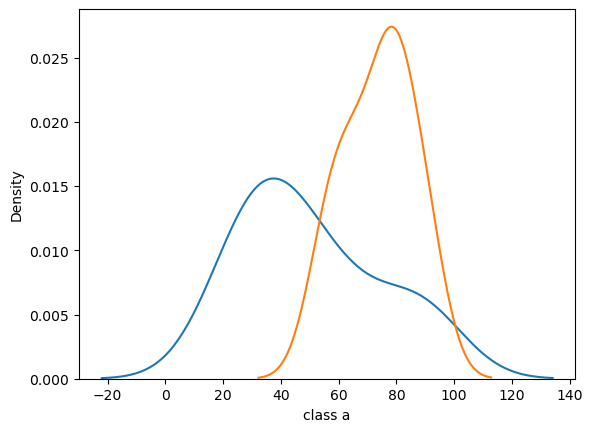

In [18]:
sns.kdeplot(df["class a"])
sns.kdeplot(df["class b"])

In [19]:
from scipy.stats import ttest_ind as ti
ti(a=df["class a"],b=df['class b'])

Ttest_indResult(statistic=-2.7739885810777563, pvalue=0.012514445839302153)

PAIRED SAMPLE TEST

Is there a significant improvement in students' test scores after they undergo a tutoring program?

In [7]:
from scipy.stats import ttest_1samp

In [4]:
rollno=[1,2,3,4,5,6,7,8,9,10]
before=[89,29,44,32,23,44,33,88,66,55]
after=[89,78,67,80,90,77,65,55,78,58]
data={"rollno":rollno,"before":before,"after":after}
df=pd.DataFrame(data)
df.set_index('rollno', inplace=True)
df.head(5)


,before,after
rollno,,
1,89,89
2,29,78
3,44,67
4,32,80
5,23,90


In [ ]:
df["difference"]=df["after"]-df["before"]

In [11]:
df.head(5)

,before,after,difference
rollno,,,
1,89,89,0
2,29,78,49
3,44,67,23
4,32,80,48
5,23,90,67


In [10]:
ttest_1samp(df["difference"],10)

Ttest_1sampResult(statistic=1.457977073986065, pvalue=0.17884048344237602)

TEST OF INDEPENDENCE:

null hypothesis=no association
alternate hypothesis=association

In [15]:
df=pd.read_csv("M5_T3_V2_TitanicSurvival.csv")

In [16]:
df.sample(5)

,Name,survived,gender,passengerClass
1118,"Peltomaki, Mr. Nikolai Johannes",no,male,3rd
150,"Harrison, Mr. William",no,male,1st
921,"Keefe, Mr. Arthur",no,male,3rd
830,"Goodwin, Mr. Charles Edward",no,male,3rd
956,"Lefebre, Miss. Jeannie",no,female,3rd


In [17]:
dframe=pd.pivot_table/
(data=df,index="passengerClass",columns="survived",aggfunc="count",values="Name")

In [18]:
dframe

survived,no,yes
passengerClass,,
1st,123,200
2nd,158,119
3rd,528,181


In [21]:
from scipy.stats import chi2_contingency as chi

In [22]:
chi(dframe)

(127.85915643930326,
 1.7208259588256175e-28,
 2,
 array([[199.62337662, 123.37662338],
        [171.19404125, 105.80595875],
        [438.18258212, 270.81741788]]))

pvalue < alpha
reject null hypothesis
there is association between the survived and passenger class column

ANALYSIS OF VARIANCE

ONE WAY ANOVA

In [24]:
df=pd.DataFrame(pd.read_csv("M5_T2_V1_Diet.csv"))

In [26]:
df.sample(5)

,gender,Age,Height,preweight,Diet,weight6weeks
65,Male,47,179,73,3,72.1
40,Female,56,171,73,3,68.9
51,Male,39,166,87,1,81.9
57,Male,45,160,78,2,72.7
46,Male,50,160,78,1,73.9


In [28]:
df["wtloss"]=df["preweight"]-df["weight6weeks"]

C:\Users\fathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='wtloss'>

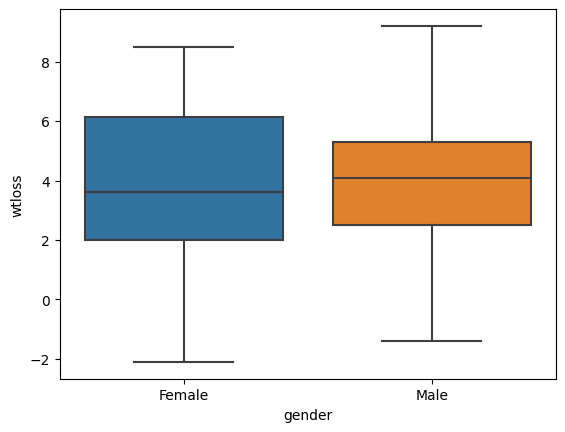

In [29]:
sns.boxplot(df.gender,df.wtloss)

In [47]:
from scipy.stats import f_oneway

In [40]:
grp=df["wtloss"].groupby(df["gender"])

In [50]:
ss.f_oneway(*[i[1] for i in grp])

F_onewayResult(statistic=0.04378592096006073, pvalue=0.8348273886348012)

In [ ]:
p value> alpha
cannot reject null hypothesis
there is no significant difference on weight loss based on gender

TWO WAY ANOVA

In [51]:
from statsmodels.formula.api import ols

In [52]:
from statsmodels.stats.anova import anova_lm

In [55]:
formula="wtloss~C(gender)+C(Diet)"

In [60]:
model=ols(formula,df).fit()

In [61]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,0.278485,0.278485,0.048877,0.825655
C(Diet),2.0,60.417220,30.208610,5.301912,0.007112
Residual,72.0,410.233112,5.697682,NaN,NaN


In [62]:
from bioinfokit.analys import stat

In [87]:
a=stat()

In [88]:
a.tukey_hsd(df,res_var="wtloss",xfac_var=["gender","Diet"],anova_model=formula)
s=a.tukey_summary

C:\Users\fathi\anaconda3\lib\site-packages\bioinfokit\analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


In [89]:
s[s["p-value"]<0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
1,"(Female, 1)","(Female, 3)",2.830000,0.232983,5.427017,4.511936,0.024717
5,"(Female, 2)","(Female, 3)",3.272857,0.675840,5.869874,5.217994,0.005583
